In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import palettable

import graphs

In [8]:
mpl.rcParams["axes.prop_cycle"] = mpl.cycler("color", palettable.matplotlib.Inferno_6.mpl_colors)

# Rocket engines
## Turbine work and heat capacity ratios
The turbine work equation is 
$$
W_t = \eta_t C_p T_1 \left[1- \left(\frac{P_2}{P_1}\right)^{\frac{\gamma-1}{\gamma}}\right]
$$

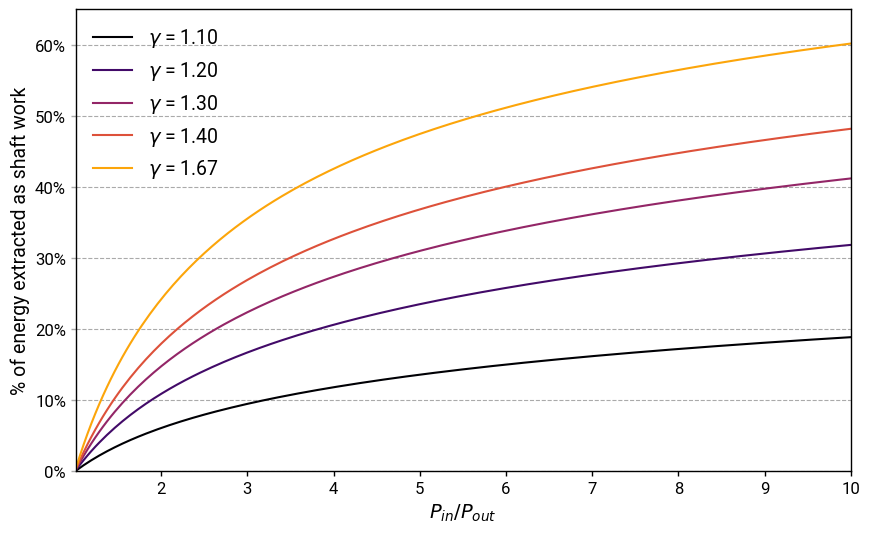

In [92]:
import graphs.plotutils
import matplotlib.ticker as ticker

graphs.plotutils.enable_graph_framed()
gammas = [1.1, 1.2, 1.3, 1.4, 1.667]

PR = np.linspace(1.01, 10, num=200)

fig, ax = plt.subplots(1,1)

base_work_coeff = 1 - np.power(1/PR, (min(gammas)-1)/min(gammas))

for gamma in gammas:
    work_coeff = 1 - np.power(1/PR, (gamma-1)/gamma)
    ratio = work_coeff
    ax.plot(PR, ratio, label=rf"$\gamma$ = {gamma:.2f}")

ax.legend()
ax.set_ylabel("% of energy extracted as shaft work")
ax.set_xlabel(r"$P_{in}/P_{out}$")
ax.set_xlim(PR.min(), PR.max())
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set_ylim(0, 0.65)
# ax.grid(False)
fig.set_size_inches(10,6)

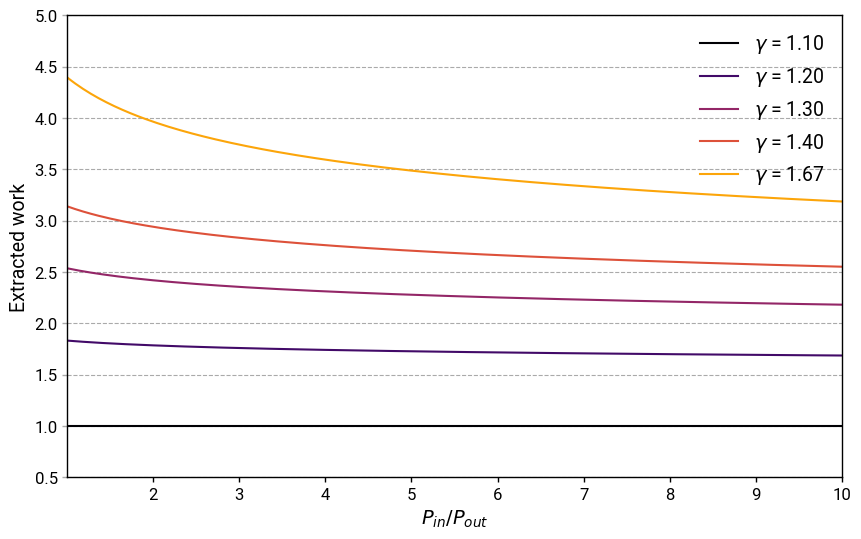

In [ ]:
fig, ax = plt.subplots(1,1)

base_work_coeff = 1 - np.power(1/PR, (min(gammas)-1)/min(gammas))

for gamma in gammas:
    work_coeff = 1 - np.power(1/PR, (gamma-1)/gamma)
    ratio = work_coeff/base_work_coeff
    ax.plot(PR, ratio, label=rf"$\gamma$ = {gamma:.2f}")

ax.legend()
ax.set_ylabel("Extracted work")
ax.set_xlabel(r"$P_{in}/P_{out}$")
ax.set_xlim(PR.min(), PR.max())
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax.set_ylim(0.0, 5.0)
# ax.grid(False)
fig.set_size_inches(10,6)

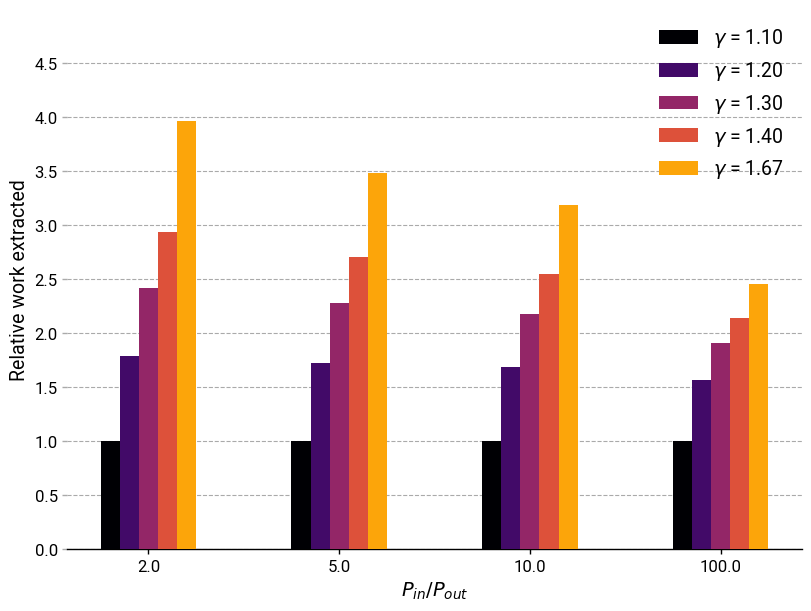

In [117]:
PRs = np.array([2.0, 5.0, 10.0, 100.0])
work_ratios = {}

graphs.plotutils.set_ygrid()

for gamma in gammas:
    base_work = 1 - np.power(1/PRs, (min(gammas)-1)/min(gammas))
    work_ratios[gamma] = (1 - np.power(1/PRs, (gamma-1)/gamma))/base_work
    
graphs.plotutils.disable_graph_frame()
fig, ax = plt.subplots(1,1, layout='constrained')

ind = np.arange(len(PRs))
width =  0.10
multiplier = 0
for gamma, ratio in work_ratios.items():
    offset = width * multiplier
    ax.bar(ind + offset, ratio, width, label=rf"$\gamma$ = {gamma:.2f}", zorder=3)
    multiplier += 1

ax.set_ylabel("Relative work extracted")
ax.set_ylim(0, 5.0)
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set_xticks(ind+width*2, PRs)
ax.set_xlabel(r"$P_{in}/P_{out}$")

ax.legend()

fig.set_size_inches(8, 6)

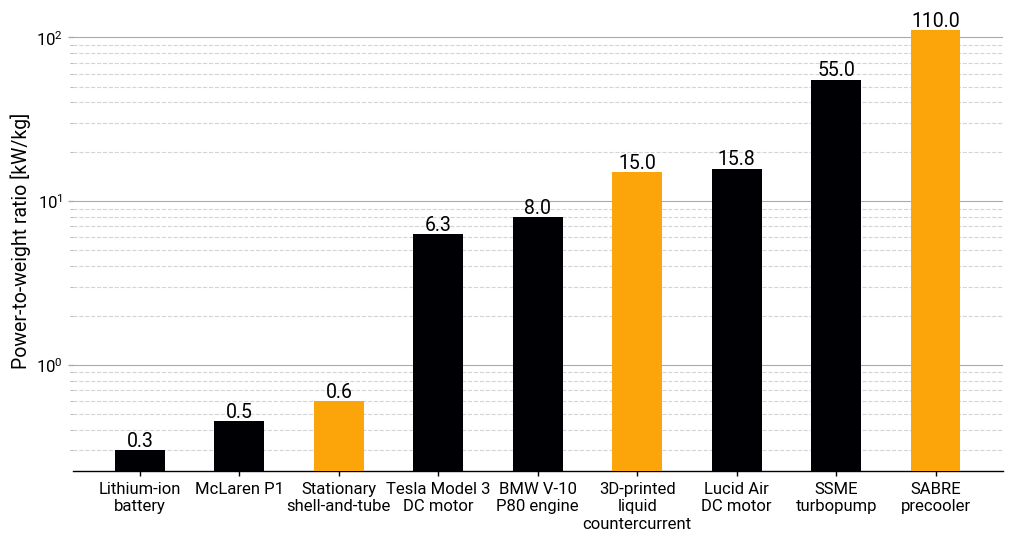

In [78]:
import pandas as pd

power_devices = {
    "SSME\nturbopump": 55.0,
    "SABRE\nprecooler": 110.0,
    "Stationary\nshell-and-tube": 0.6,
    "3D-printed\nliquid\ncountercurrent": 15,
    "Lucid Air\nDC motor": 15.8,
    "BMW V-10\nP80 engine": 7.96,
    "Tesla Model 3\nDC motor": 6.26,
    "Lithium-ion\nbattery": 0.3,
    "McLaren P1": 0.452,
}

heat_exchangers = ["3D-printed\nliquid\ncountercurrent", "SABRE\nprecooler", "Stationary\nshell-and-tube"]

devices = pd.DataFrame.from_dict(power_devices,columns=["Power-to-weight"], orient="index")
devices.sort_values(by="Power-to-weight", inplace=True,)
devices["Is_HX"] = False
devices.loc[heat_exchangers, "Is_HX"] = True
bar_colors = [palettable.matplotlib.Inferno_6.mpl_colors[-2] if val else palettable.matplotlib.Inferno_6.mpl_colors[0] for val in devices["Is_HX"]]

fig, ax = plt.subplots(1,1)
bars = ax.bar(devices.index, devices["Power-to-weight"], width=0.5, zorder=3, color=bar_colors)
ax.bar_label(bars, fmt="{:.1f}")
ax.set_yscale('log', base=10)
ax.set_ylabel("Power-to-weight ratio [kW/kg]")
# ax.set_xticklabels(devices.index, rotation=0)
ax.grid(which='minor', axis='y', linestyle="dashed", alpha=0.5)
ax.grid(which='major', axis='y', linestyle="solid")
fig.set_size_inches(12,6)

/tmp/ipykernel_2104/594500398.py:6: RuntimeWarning: invalid value encountered in divide
  return CP/CV


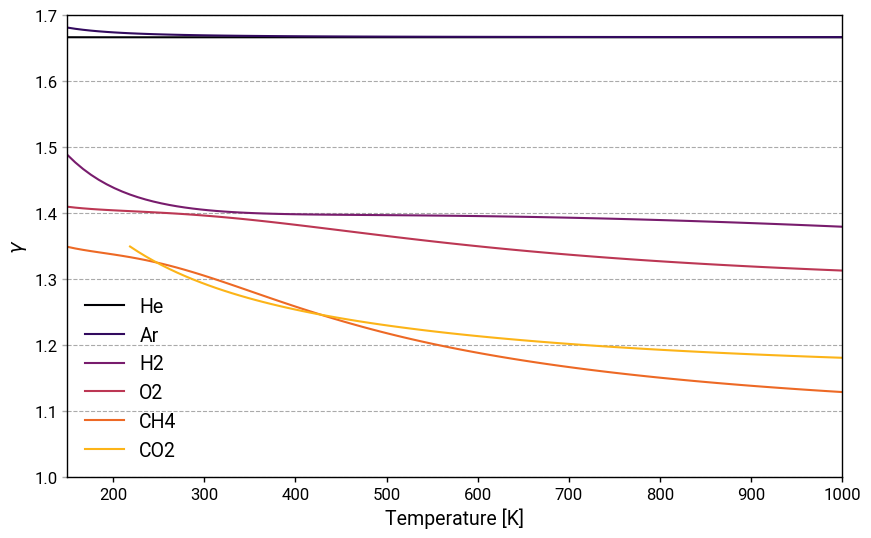

In [115]:
import CoolProp.CoolProp as cp

def gamma(species:str, T, P):
    CP = cp.PropsSI('C', 'T', T,'P', P, species)
    CV = cp.PropsSI('Cvmass', 'T', T, 'P', P, species)
    return CP/CV

temperatures = np.linspace(150, 1000, num=100)
atm = 101325

species = ["He", "Ar", "H2", "O2", "CH4", "CO2"]
cpcvs = []
for s in species:
    cpcvs.append(gamma(s, temperatures, atm))
    
# AR_cpcv = gamma('Ar', temperatures, atm)
# CH4_cpcv = gamma('Methane', temperatures, atm)
# O2_cpcv = gamma('O2', temperatures, atm)
# CO2_cpcv = gamma('CO2', temperatures, atm)

fig, ax= plt.subplots(1,1)
ax.set_prop_cycle(color=palettable.matplotlib.Inferno_7.mpl_colors)
for s, cpcv in zip(species, cpcvs):
    ax.plot(temperatures, cpcv, label=s)

ax.legend()
ax.set_ylabel(r"$\gamma$")
ax.set_ylim(1.0, 1.7)

ax.set_xlabel("Temperature [K]")
ax.set_xlim(150, 1000)
fig.set_size_inches(10,6)